## Test of inverted double pendulum control with mppi


In [2]:
import torch
import numpy as np
import pybullet as p
import pybullet_data as pd
from base_env import BaseEnv
import gym
from mppi import MPPI
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from IPython import display
from tqdm.notebook import tqdm
from celluloid import Camera
import os
import imageio

In [3]:
%load_ext autoreload
%autoreload 2

In [3]:
from double_pendulum_system import *
controller = DoublePendulumControl(dynamics=dynamics_analytic,cost_function=cost_function)
initial_state = torch.from_numpy(np.random.randn(6))
initial_state = torch.tensor([0,0,np.pi,0,np.pi,0])
state = initial_state
target = torch.tensor([0,0,0,0,0,0])
num_steps = 100
pbar = tqdm(range(num_steps))

if not os.path.exists('plots'):
    os.makedirs('plots')
    
action = controller.control_calcu(state)
state = dynamics_analytic(state,action)

for i in pbar:
    
    action = controller.control_calcu(state)
    # print(action)
    
    # action -= K*state[0]

    state = dynamics_analytic(state,action)
    state = state.squeeze()
    # print(state)
    error_i = np.linalg.norm(state[1:]-target[1:])
    pbar.set_description(f'Goal Error: {error_i:.4f}')

    # --- Start plotting
    fig, ax = plt.subplots()
    ax = plt.axes(xlim=(state[0]-10, state[0]+10), ylim=(-2, 2))
    ax.set_aspect('equal')
    ax.grid()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Double Pendulum at t={:.2f}'.format(i*0.05))
    x = state[0]
    theta1 = state[2]
    theta2 = state[4]
    L1 = 0.5
    L2 = 0.5
    x1 = x + L1*torch.sin(theta1)
    y1 = L1*torch.cos(theta1)
    x2 = x1 + L2*torch.sin(theta2)
    y2 = y1 + L2*torch.cos(theta2)
    plt.plot([x,x1],[0,y1],color='black')   
    plt.plot([x1,x2],[y1,y2],color='black')
    filename = os.path.join('plots', 'plot_{:03d}.png'.format(i))
    # plt.show()
    plt.savefig(filename)
    plt.close()
    if error_i < 0.1:
        break
    # --- End plotting

images = []
for i in range(num_steps):
    filename = os.path.join('plots', 'plot_{:03d}.png'.format(i))
    images.append(imageio.imread(filename))
imageio.mimsave('double_pendulum.gif', images, duration=0.1)



  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_629/2988749054.py:56: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


  0%|          | 0/100 [00:00<?, ?it/s]

c:\Users\Lamfu\PycharmProjects\ROB_498\venv\double_inverted_pendulum_cart\DDPController.py:195: RuntimeWarning: invalid value encountered in matmul
  delta_x = X_new[t] - X[t]


[-46.1223637]
[0.63669396]


c:\Users\Lamfu\PycharmProjects\ROB_498\venv\double_inverted_pendulum_cart\doublePendulumDynamics.py:37: RuntimeWarning: invalid value encountered in multiply
  theta_ddot = np.linalg.inv(D) @ (H*control - C @ theta_dot - G)


[150.1996712]
[0.75749229]
[0.32079809]
[0.34639107]
[0.06763634]
[-57.54926664]
[0.67025652]
[0.56969075]
[0.24554611]
[0.65716639]
[0.80079974]
[0.77518177]
[0.36239202]
[0.189004]
[0.47392713]
[0.42254095]
[0.80635789]
[0.102381]
[0.92424974]
[0.73780077]
[0.85739853]
[0.01192433]
[0.58650158]
[0.22235078]
[0.85006662]
[0.18498486]
[0.52441733]
[0.62721104]
[0.83258587]
[0.62780704]
[0.81917895]
[0.29920444]
[0.80964213]
[0.8251]
[0.02562339]
[0.03513459]
[0.86848161]
[0.50147543]
[0.93312206]
[0.68351009]
[0.32742251]
[0.64177411]
[0.02305905]
[0.38436244]
[0.94714449]
[0.97082909]
[0.13600664]
[0.62124286]
[0.95450637]
[0.57410571]
[0.32678638]
[0.92498578]


c:\Users\Lamfu\PycharmProjects\ROB_498\venv\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in subtract
  return f_raw(*args, **kwargs)


[0.57309674]
[0.32702774]
[0.23911889]
[0.59170597]
[0.97288665]
[0.67203043]
[0.93879717]
[0.74482133]
[0.4945553]
[0.71727902]
[0.48817819]
[0.04123768]
[0.29338921]
[0.75741355]
[0.41499599]
[0.08972932]
[0.8020306]
[0.05548415]


c:\Users\Lamfu\PycharmProjects\ROB_498\venv\lib\site-packages\autograd\core.py:212: RuntimeWarning: overflow encountered in add
  def _add(self, x, y):        return x + y


[0.09726027]
[0.30095063]
[0.22685252]
[0.0483142]
[0.03765291]
[0.86671715]
[0.42036901]
[0.92557802]
[0.40859504]
[0.65020952]
[0.90462286]
[0.65501261]
[0.31524663]
[0.69043087]
[0.01537515]
[0.19937665]
[0.64822478]
[0.42966738]
[0.78363945]


C:\Users\Lamfu\AppData\Local\Temp\ipykernel_27012\3486760303.py:75: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax = plt.axes(xlim=(state[0]-10, state[0]+10), ylim=(-2, 2))


[0.21017211]
[0.21600695]
[0.40253263]
[0.12934372]


ValueError: Axis limits cannot be NaN or Inf

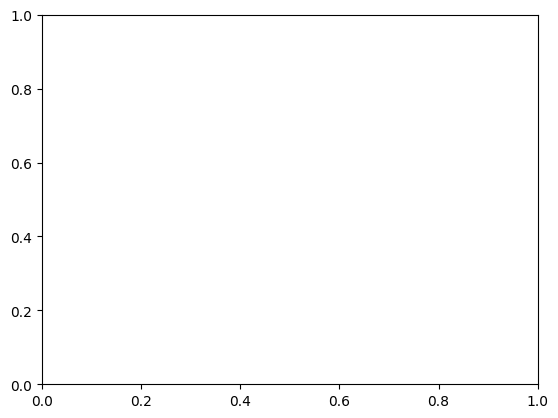

In [75]:
from DDPController import *
from doublePendulumDynamics import *
import autograd.numpy as np

if not os.path.exists('plots'):
    os.makedirs('plots')

state_dim = 6
action_dim = 1
x_final = np.array([.0, .0, .0, .0, .0, .0])
# Q = np.diag([1., 1., 1., 1., 1., 1.])
# Q = np.diag([10., 10., 5000., 100., 5000., 100.])
Q = np.diag([50., 200., 1000., 100., 1000., 100.])
R = np.array([[.3]])
terminal_scale = 100.
cost = Cost(x_final, terminal_scale, Q, R)
dynamics_analytic = dynamics_numpy

controller = DDPcontroller(dynamics_analytic, cost)
# initial_state = np.random.randn(state_dim)
initial_state = np.array([0,0,np.pi,0,np.pi,0])
# initial_state = np.array([.0, .0, .0, .0, .0, .0])
state = initial_state

target = x_final

num_steps = 100
pbar = tqdm(range(num_steps))

if not os.path.exists('plots'):
    os.makedirs('plots')

for i in pbar:
    
    action = controller.command(state)
    print(action)
    
    # action -= K*state[0]

    state = dynamics_analytic(state,action)
    state = state.squeeze()
    # print(state)
    error_i = np.linalg.norm(state[1:]-target[1:])
    pbar.set_description(f'Goal Error: {error_i:.4f}')

    # --- Start plotting

    # ax = plt.axes(xlim=(state[0]-10, state[0]+10), ylim=(-2, 2))
    # ax.set_aspect('equal')
    # ax.grid()
    # ax.set_xlabel('x')
    # ax.set_ylabel('y')
    # ax.set_title('Double Pendulum at t={:.2f}'.format(i*0.05))
    # x = state[0]
    # theta1 = state[2]
    # theta2 = state[4]
    # L1 = 0.5
    # L2 = 0.5
    # x1 = x + L1*np.sin(theta1)
    # y1 = L1*np.cos(theta1)
    # x2 = x1 + L2*np.sin(theta2)
    # y2 = y1 + L2*np.cos(theta2)
    # plt.plot([x,x1],[0,y1],color='black')   
    # plt.plot([x1,x2],[y1,y2],color='black')
    # plt.draw()
    # plt.pause(1e-17)
    # # time.sleep(0.025)
    # plt.clf()
    # if error_i < 0.1:
    #     break


    # --- Start plotting
    fig, ax = plt.subplots()
    ax = plt.axes(xlim=(state[0]-10, state[0]+10), ylim=(-2, 2))
    ax.set_aspect('equal')
    ax.grid()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Double Pendulum at t={:.2f}'.format(i*0.05))
    x = state[0]
    theta1 = state[2]
    theta2 = state[4]
    L1 = 0.5
    L2 = 0.5
    x1 = x + L1*np.sin(theta1)
    y1 = L1*np.cos(theta1)
    x2 = x1 + L2*np.sin(theta2)
    y2 = y1 + L2*np.cos(theta2)
    plt.plot([x,x1],[0,y1],color='black')   
    plt.plot([x1,x2],[y1,y2],color='black')
    filename = os.path.join('plots', 'plot_{:03d}.png'.format(i))
    # plt.show()
    plt.savefig(filename)
    plt.close()
    if error_i < 0.1:
        break
    # --- End plotting

images = []
for i in range(num_steps):
    filename = os.path.join('plots', 'plot_{:03d}.png'.format(i))
    images.append(imageio.imread(filename))
imageio.mimsave('double_pendulum.gif', images, duration=0.1)
    # --- End plotting
plt.show()
plt.close()



In [72]:
a = [1,2,3,4]
print(a)
a.reverse()
print(a)
a = np.random.randn(1,6)
b = np.random.randn(6)
print(a.shape)
print(b.shape)
c = a @ b
print(c.shape)

[1, 2, 3, 4]
[4, 3, 2, 1]
(1, 6)
(6,)
(1,)


  0%|          | 0/100 [00:00<?, ?it/s]

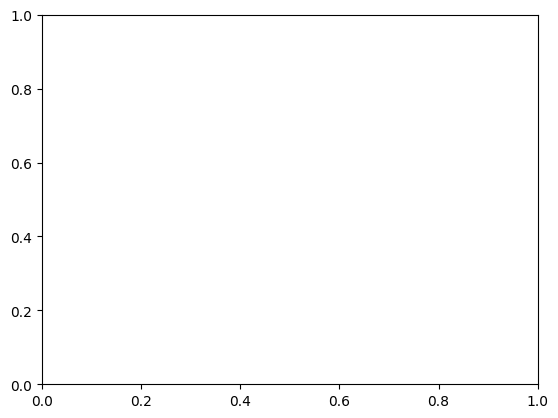

In [31]:

# %load_ext autoreload
# %autoreload 2

from double_pendulum_system import *
controller = DoublePendulumControl(dynamics=dynamics_analytic,cost_function=cost_function)
# initial_state = torch.from_numpy(np.random.randn(6))
initial_state = torch.tensor([0,0,np.pi,0,np.pi,0])
state = initial_state
target = torch.tensor([0,0,0,0,0,0])
num_steps = 100
pbar = tqdm(range(num_steps))

# if not os.path.exists('plots'):
#     os.makedirs('plots')

fig, ax = plt.subplots()
for i in pbar:
    
    action = controller.control_calcu(state)
    # print(action)
    
    # action -= K*state[0]

    state = dynamics_analytic(state,action)
    state = state.squeeze()
    # print(state)
    error_i = np.linalg.norm(state[1:]-target[1:])
    pbar.set_description(f'Goal Error: {error_i:.4f}')

    # --- Start plotting

    # ax = plt.axes(xlim=(state[0]-10, state[0]+10), ylim=(-2, 2))
    # ax.set_aspect('equal')
    # ax.grid()
    # ax.set_xlabel('x')
    # ax.set_ylabel('y')
    # ax.set_title('Double Pendulum at t={:.2f}'.format(i*0.05))
    # x = state[0]
    # theta1 = state[2]
    # theta2 = state[4]
    # L1 = 0.5
    # L2 = 0.5
    # x1 = x + L1*torch.sin(theta1)
    # y1 = L1*torch.cos(theta1)
    # x2 = x1 + L2*torch.sin(theta2)
    # y2 = y1 + L2*torch.cos(theta2)
    # plt.plot([x,x1],[0,y1],color='black')   
    # plt.plot([x1,x2],[y1,y2],color='black')
    # plt.draw()
    # plt.pause(1e-17)
    # # time.sleep(0.025)
    # plt.clf()
    
    
    if error_i < 0.1:
        break
    # --- End plotting
plt.show()
plt.close()
